In [1]:
from smart_open import open
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Load data for all positions

In [2]:
data = pd.read_csv("../data/training_pruned_file_20162021.csv")

In [3]:
players = data

In [4]:
sorted(players.columns.values)

['accurate_crosses.total',
 'accurate_passes.total',
 'aerials_won.total',
 'agent_name',
 'bench.total',
 'big_chances_created.total',
 'big_chances_missed.total',
 'birth.country',
 'blocked_shots.total',
 'captain.total',
 'cards.red',
 'cards.yellow',
 'cards.yellowred',
 'clearances.total',
 'common_name',
 'continent',
 'country_name',
 'date',
 'date_of_birth',
 'dispossessed.total',
 'dribbled_past.total',
 'dribbles.attempts',
 'dribbles.past',
 'dribbles.success',
 'duels.total',
 'duels.won',
 'duels_won.total',
 'error_lead_to_goal.total',
 'firstname_x',
 'foot',
 'fouls.committed',
 'fouls.drawn',
 'fouls.total',
 'fouls_drawn.total',
 'games.appearences',
 'games.captain',
 'games.lineups',
 'games.minutes',
 'games.number',
 'games.position',
 'games.rating',
 'gender',
 'global_performance',
 'goals.assists',
 'goals.conceded',
 'goals.goals',
 'goals.penalties',
 'goals.saves',
 'goals.total_y',
 'height_x',
 'highest_market_value_in_eur',
 'hit_woodwork.total',
 'int

In [5]:
data["league_name"].unique()

array(['Premier League', 'Ligue 1', 'Bundesliga', 'Serie A', 'La Liga'],
      dtype=object)

## Select variables

In [163]:
players_selected_vars = players[[
    "name",
    "player_id_api",
    "date_of_birth",
    "nationality",
    "team_name",
    'league_name',
     'league.season',
    # "error_lead_to_goal.total",
    # "saves_inside_box.total",
    "games.appearences",
    "games.lineups",
    "games.minutes",
    # "goals.conceded",
    # "goals.saves",
    # "penalty.saved",
    # "highest_market_value_in_eur",
    "market_value_in_eur_x",
    # "own_goals.total",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]].copy().rename({
    "team_name": "team",
    "league_name": "league",
    "league.season": "season",
    "games.appearences": "matches_played",
    "games.lineups": "matches_started",
    "games.minutes": "minutes",
    # "goals.conceded": "goals_against",
    # "goals.saves": "saves",
    # "saves_inside_box.total": "saves_inside_box",
    # "penalty.saved": "penalty_kicks_saves",
    # "own_goals.total": "own_goals_against",
    # "error_lead_to_goal.total": "errors_to_goal",
    "market_value_in_eur_x": "market_value",
}, axis=1)
players_selected_vars["90s_played"] = players_selected_vars["minutes"] / 90
# players_selected_vars["goals_against_90s"] = players_selected_vars["goals_against"] / players_selected_vars["90s_played"]
# players_selected_vars["shots_on_target_against"] = players_selected_vars["goals_against"] + players_selected_vars["saves"]
# players_selected_vars["save%"] = players_selected_vars["saves"] / players_selected_vars["shots_on_target_against"]
players_selected_vars["age"] = pd.to_datetime(players_selected_vars["date_of_birth"]).map(lambda x: int((pd.Timestamp.today() - x).days / 365))
# players_selected_vars["own_goals_against"] = players_selected_vars["own_goals_against"].fillna(0)
for per_90 in [
    # "shots_on_target_against",
    # "saves_inside_box",
    # "saves",
    # "penalty_kicks_saves",
    # "own_goals_against",
    # "goals_against",
    # "accurate_crosses.total",
    # "big_chances_created.total",
    # "big_chances_missed.total",
    # "blocked_shots.total",
    # "dribbled_past.total",
    # "goals.goals",
    # "offsides.total",
    # "shots_off_target.total",
    # "through_balls.total",
    # "total_crosses.total",
    # "shots.total",
    # "shots.on",
    # "goals.total_y",
    # "goals.assists",
    # "passes.key",
    # "dribbles.attempts",
    # "dribbles.success",
    # "dribbles.past",
]:
    players_selected_vars[per_90] = players_selected_vars[per_90] / players_selected_vars["90s_played"]


players_selected_vars.replace([np.inf, -np.inf], np.nan, inplace=True)
    
players_selected_vars = players_selected_vars.drop([
    "date_of_birth",
    "minutes",
], axis=1)

order = [
    "name",
    "player_id_api",
    "age",
    "nationality",
    "league",
    "team",
    "season",
    "matches_played",
    "matches_started",
    # "minutes",
    "90s_played",
    # "goals_against",
    # "own_goals_against",
    # "shots_on_target_against",
    # "saves",
    # "save%",
    # "saves_inside_box",
    # "penalty_kicks_saves",
    "market_value",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]
players_selected_vars = players_selected_vars[order + list(set(players_selected_vars.columns).difference(order))]
players_selected_vars

,name,player_id_api,age,nationality,league,team,season,matches_played,matches_started,90s_played,...,duels.won,dribbles.attempts,dribbles.success,dribbles.past,fouls.committed,cards.yellow,cards.yellowred,cards.red,penalty.commited,penalty.saved
0,George Thomas,20479,26,Wales,Premier League,Leicester City,2017,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1,Harvey Lewis Barnes,18778,25,England,Premier League,Leicester City,2017,3.0,0.0,0.077778,...,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN
2,Andy King,19217,34,Wales,Premier League,Leicester City,2017,11.0,9.0,7.977778,...,24.0,4.0,1.0,NaN,5.0,1.0,0.0,0.0,NaN,NaN
3,Marc Albrighton,18777,33,England,Premier League,Leicester City,2017,34.0,30.0,28.266667,...,140.0,95.0,52.0,NaN,20.0,5.0,0.0,1.0,1.0,NaN
4,Kelechi Promise Iheanacho,2778,26,Nigeria,Premier League,Leicester City,2017,21.0,7.0,9.144444,...,37.0,18.0,13.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Matěj Vydra,18930,31,Czech Republic,Premier League,Burnley,2021,22.0,5.0,7.400000,...,44.0,14.0,6.0,NaN,9.0,1.0,0.0,0.0,NaN,NaN
14769,Josh Brownhill,19268,27,England,Premier League,Burnley,2021,35.0,32.0,32.811111,...,155.0,30.0,15.0,NaN,39.0,10.0,0.0,0.0,NaN,NaN
14770,Ashley Barnes,18927,33,England,Premier League,Burnley,2021,23.0,8.0,8.888889,...,77.0,8.0,5.0,NaN,21.0,4.0,0.0,0.0,NaN,NaN
14771,Wout Weghorst,25416,30,Netherlands,Premier League,Burnley,2021,18.0,17.0,17.244444,...,96.0,8.0,7.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN


In [153]:
from helpers import TEAM_TIERS

In [164]:
players_selected_vars = pd.merge(players_selected_vars, TEAM_TIERS, left_on="team", right_index=True)

In [173]:
players_selected_vars.loc[players_selected_vars["tier"] == "-1", "tier"] = None

In [175]:
for c in players_selected_vars.columns:
    players_selected_vars[f"has_{c}"] = (~players_selected_vars[c].isnull()).astype(int)

In [177]:
mvs = players_selected_vars["market_value"].values
mvs = np.expand_dims(mvs, axis=1)
mvs = normalize(mvs, norm="max", axis=0)
mvs = np.squeeze(mvs)
players_selected_vars["normalised_market_value"] = mvs

In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Transformation pipeline

In [253]:
numeric_features = [
    "age",
    "matches_played",
    "matches_started",
    "90s_played",
    # "goals_against",
    # "own_goals_against",
    # "shots_on_target_against",
    # "saves",
    # "save%",
    # "saves_inside_box",
    # "penalty_kicks_saves",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

binary_features = [f"has_{c}" for c in numeric_features if f"has_{c}" in players_selected_vars.columns]
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0))
    ]
)

categorical_features = [
    "nationality",
    "league",
    "team",
    "tier",
    "position",
    "position_name_y",
]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("bin", binary_transformer, binary_features),
    ]
)

# Predict price bucket

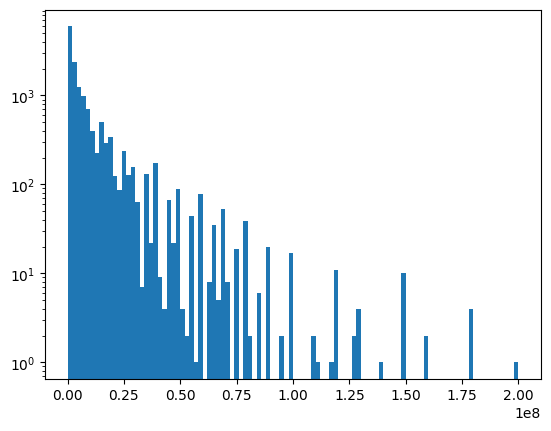

In [179]:
plt.hist(players_selected_vars["market_value"], bins=100)
# plt.xlim((0, 0.5e8))
plt.yscale("log")

In [254]:
bins = [
    0.0025,
    0.005,
    0.01,
    0.025,
    0.05, # 
    0.1, # 8 - 20
    0.25, # 20 - 40
    0.5,  # 40 -80
    1.0  # 80M
]
y = np.digitize(players_selected_vars["normalised_market_value"], bins)
# bins = np.concatenate([
#     np.arange(200_000, 4_000_000, 200_000),
#     np.arange(4_000_000, 20_000_000, 2_000_000),
#     np.arange(20_000_000, 100_000_000, 5_000_000),
#     np.arange(100_000_000, 200_000_001, 10_000_000)
# ])
# y = np.digitize(players_selected_vars["market_value"], bins)
X = players_selected_vars

In [255]:
goalkeepers = (X["position"] == "Goalkeeper").values
attackers = (X["position"] == "Attack").values
defenders = (X["position"] == "Defender").values
midfielders = (X["position"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [256]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1698, 1062, 1504, 2629, 1824, 1463, 1258,  322,   41,    1]))

In [257]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

y_random = random.predict(X_test)

balanced_accuracy_score(y_test, y_random)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.10806993049789451

In [258]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

goalkeepers 0.11140146864075257
attackers 0.10683421079549994
defenders 0.10516133247349957
midfielders 0.12159641375594155


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [259]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)

y_lr = clf.predict(X_test)

balanced_accuracy_score(y_test, y_lr)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3730436281373823

In [260]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], clf.predict(X_test[selector])))

goalkeepers 0.33299965983719537
attackers 0.3846774478079932
defenders 0.3927727676770376
midfielders 0.3714540756925597


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Only model specific to goalkeepers performs better on that position than the "all positions" model.
Performance on other positions is similar or marginally better with the generic model.

In [261]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp.fit(X_train, y_train)

y_mlp = mlp.predict(X_test)

balanced_accuracy_score(y_test, y_mlp)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.41287186818296145

In [262]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], mlp.predict(X_test[selector])))

goalkeepers 0.3971225873598969
attackers 0.41138418827422396
defenders 0.44510468651873303
midfielders 0.4136327894233853


Models specific for goalkeeprs and midfielders are slighlty better than one generic model.

In [263]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", XGBClassifier(learning_rate=1)),
    ]
)
xgboost.fit(X_train, y_train)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test, y_xgboost)

0.4421478258092982

In [264]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], xgboost.predict(X_test[selector])))

goalkeepers 0.41299547492562505
attackers 0.43644803921897707
defenders 0.44782681155538595
midfielders 0.3915904597615192


In [265]:
from collections import defaultdict
arr = np.zeros((10, 10))
for a, b in zip(y_test, y_xgboost):
    arr[a, b] = arr[a, b] + 1

In [266]:
arr

array([[334.,  50.,  21.,  26.,   4.,   1.,   1.,   0.,   0.,   0.],
       [ 66.,  65.,  77.,  52.,   6.,   0.,   0.,   0.,   0.,   0.],
       [ 36.,  56., 103., 159.,  25.,   3.,   0.,   0.,   0.,   0.],
       [ 14.,  29.,  81., 331., 111.,  29.,   3.,   0.,   0.,   0.],
       [  5.,   3.,  20., 143., 175.,  93.,  13.,   1.,   0.,   0.],
       [  0.,   0.,  11.,  48., 112., 148.,  76.,   5.,   0.,   0.],
       [  1.,   0.,   2.,  10.,  22.,  70., 186.,  18.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   2.,   2.,  52.,  33.,   2.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   5.,   3.,   6.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

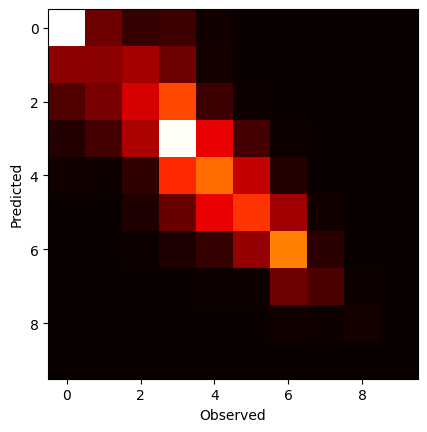

In [267]:
plt.imshow(arr, cmap='hot')
plt.xlabel("Observed")
plt.ylabel("Predicted")
_ = plt.show()

In [237]:
x = np.unique(y_test - y_xgboost, return_counts=True)
a, b =x

In [238]:
cnt = 0
for q,w in zip(a, b):
    print(q, w)
    cnt += w
cnt

-6 1
-5 1
-4 4
-3 39
-2 146
-1 586
0 1381
1 583
2 162
3 40
4 7
6 1


2951

In [239]:
(583 + 1397 + 569) / 2951

0.8637749915282955

In [240]:
np.unique(y_lr, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([538, 124, 278, 807, 416, 345, 384,  50,   9]))

## Features importance

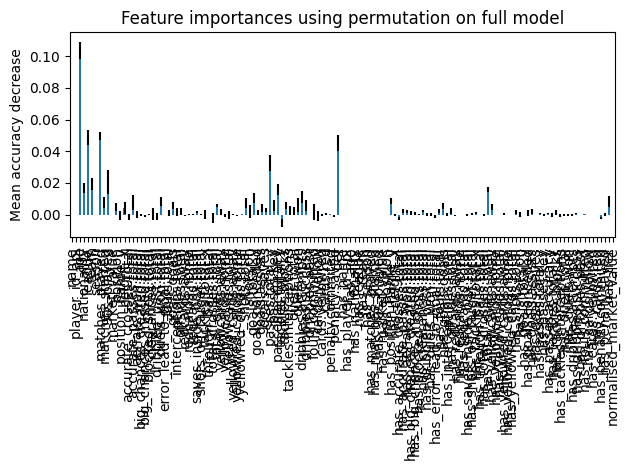

In [213]:
result = permutation_importance(
    xgboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict market value

In [450]:
from sklearn.metrics import r2_score

In [451]:
def r2_adj(model, x, y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

def r2_adj2(x, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

In [452]:
X = players_selected_vars
# y = players_selected_vars["normalised_market_value"]
y = np.log(players_selected_vars["market_value"])
# y = players_selected_vars["market_value"]

In [453]:
X_train = X.loc[X["season"] < 2021]
X_test = X.loc[X["season"] == 2021]
y_train = y.loc[X["season"] < 2021]
y_test = y.loc[X["season"] == 2021]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11576, 135), (3177, 135), (11576,), (3177,))

In [454]:
selectors_train = dict()
selectors_test = dict()
for p in ["Goalkeeper", "Attack", "Defender", "Midfield"]:
    selectors_train[p] = (X_train["position"] == p).values
    selectors_test[p] = (X_test["position"] == p).values

In [455]:
# goalkeepers = (X["position"] == "Goalkeeper").values
# attackers = (X["position"] == "Attack").values
# defenders = (X["position"] == "Defender").values
# midfielders = (X["position"] == "Midfield").values

# (
#     X_train, X_test, 
#     y_train, y_test, 
#     goalkeepers_train, goalkeepers_test,
#     attackers_train, attackers_test,
#     defenders_train, defenders_test, 
#     midfielders_train, midfielders_test
# ) = train_test_split(
#     X, y, 
#     goalkeepers, attackers, defenders, midfielders,
#     test_size=0.2, random_state=42
# )

In [456]:
random_regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", DummyRegressor()),
    ]
)
random_regression.fit(X_train, y_train)

random_regression.score(X_test, y_test), r2_adj(random_regression, X_test, y_test)

(-0.0029056377563880798, -0.047427920261193135)

In [457]:
for name, selector in selectors_test.items():
    print(name, random_regression.score(X_test[selector], y_test[selector]), r2_adj(random_regression, X_test[selector], y_test[selector]))

Goalkeeper -0.4759743443462152 -1.4385663080502686
Attack -0.01179621212048132 -0.15962358077444772
Defender -0.002601111987312832 -0.14908504068675787
Midfield -0.0007793519722019138 -0.23452539438785447


In [486]:
y_2020 = X_train.loc[X_train["season"] == 2020].groupby("player_id_api")["market_value"].mean()
y_prev = pd.merge(
    y_2020,
    X_test,
    left_index=True,
    right_on="player_id_api",
    how="right"
)["market_value_x"].fillna(y_2020.mean())

In [487]:
r2_score(np.exp(y_test), y_prev), r2_adj2(X_test, np.exp(y_test), y_prev)

(0.7324329524775599, 0.7205547704928412)

In [488]:
for name, selector in selectors_test.items():
    print(name, r2_score(np.exp(y_test)[selector], y_prev[selector]), r2_adj2(X_test[selector], np.exp(y_test)[selector], y_prev[selector]))

Goalkeeper 0.4638950500381205 0.11426138701950339
Attack 0.7407689064052191 0.7028942336397479
Defender 0.7212726207127405 0.6805494646480434
Midfield 0.7480146559260092 0.6891599475350252


In [479]:
regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", LinearRegression()),
    ]
)
regression.fit(X_train, y_train)

y_reg = regression.predict(X_test)

# regression.score(X_test, y_test), r2_adj(regression, X_test, y_test)
r2_score(np.exp(y_test), np.exp(y_reg)), r2_adj2(X_test, np.exp(y_test), np.exp(y_reg))

(0.5528578289177031, 0.5330077160942536)

In [481]:
for name, selector in selectors_test.items():
    y_reg = regression.predict(X_test[selector])
    print(name, r2_score(np.exp(y_test[selector]), np.exp(y_reg)), r2_adj2(X_test[selector], np.exp(y_test[selector]), np.exp(y_reg)))
    # print(name, regression.score(X_test[selector], y_test[selector]), r2_adj(regression, X_test[selector], y_test[selector]))

Goalkeeper 0.5915769951029235 0.3252141658222214
Attack 0.5457331102488976 0.47936294778526256
Defender 0.6009795013723684 0.5426810518975521
Midfield 0.47627092514105207 0.3539466602518514


Only model specific for midfielder is slightly better than the generic one.

In [482]:
from sklearn.neural_network import MLPRegressor

mlp_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp_reg.fit(X_train, y_train)

y_mlp = mlp_reg.predict(X_test)

# mlp_reg.score(X_test, y_test), r2_adj(mlp_reg, X_test, y_test)
r2_score(np.exp(y_test), np.exp(y_mlp)), r2_adj2(X_test, np.exp(y_test), np.exp(y_mlp))

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0.6335308302096869, 0.6172620574633232)

In [483]:
for name, selector in selectors_test.items():
    y_mlp = mlp_reg.predict(X_test[selector])
    print(name, r2_score(np.exp(y_test[selector]), np.exp(y_mlp)), r2_adj2(X_test[selector], np.exp(y_test[selector]), np.exp(y_mlp)))
    # print(name, mlp_reg.score(X_test[selector], y_test[selector]), r2_adj(mlp_reg, X_test[selector], y_test[selector]))

Goalkeeper 0.7229667381524556 0.5422928717301441
Attack 0.641730444022677 0.5893858660389772
Defender 0.6418927014111234 0.5895718298640473
Midfield 0.5658246955620791 0.4644169687469938


"All positions" model performs better than position specific models.

In [485]:
from xgboost import XGBRegressor

xgboost_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", XGBRegressor()),
    ]
)
xgboost_reg.fit(X_train, y_train)

y_xgboost = xgboost_reg.predict(X_test)


# xgboost_reg.score(X_test, y_test), r2_adj(xgboost_reg, X_test, y_test)
r2_score(np.exp(y_test), np.exp(y_xgboost)), r2_adj2(X_test, np.exp(y_test), np.exp(y_xgboost))

(0.7227644399847708, 0.7104570409048445)

In [343]:
for name, selector in selectors_test.items():
    print(name, xgboost_reg.score(X_test[selector], y_test[selector]), r2_adj(xgboost_reg, X_test[selector], y_test[selector]))

Goalkeeper 0.7733783987149372 0.6255817022246788
Attack 0.7612548602974558 0.7263732652110452
Defender 0.7720824360948613 0.7387827920178118
Midfield 0.8067544157914511 0.7616192014866863


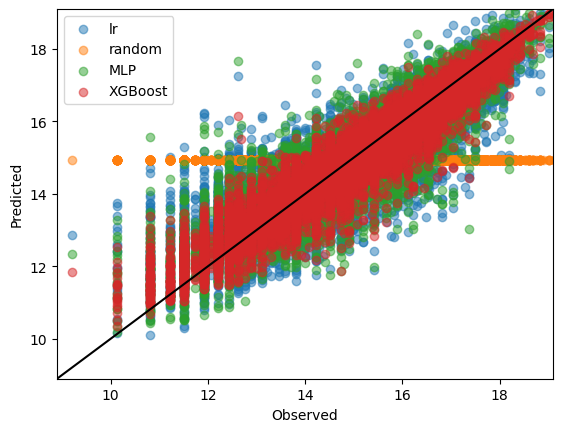

In [344]:
plt.scatter(y_train, regression.predict(X_train), alpha=0.5, label="lr")
plt.scatter(y_train, random_regression.predict(X_train), alpha=0.5, label="random")
plt.scatter(y_train, mlp_reg.predict(X_train), alpha=0.5, label="MLP")
plt.scatter(y_train, xgboost_reg.predict(X_train), alpha=0.5, label="XGBoost")
plt.axline((0, 0), (1, 1), c="k")
plt.xlim(np.floor(y_train.min())-0.1, np.ceil(y_test.max())+0.1)
plt.ylim(np.floor(y_train.min())-0.1, np.ceil(y_test.max())+0.1)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()
_ = plt.show()

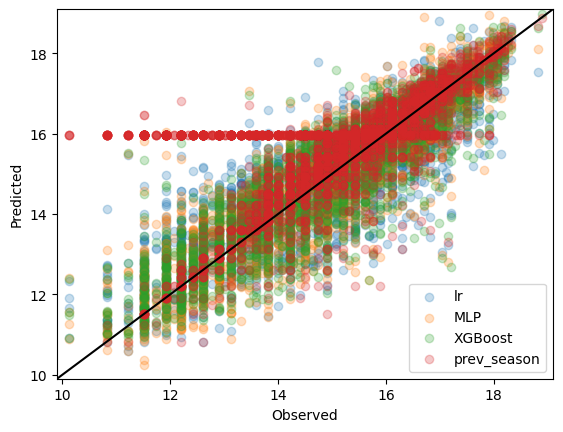

In [497]:
plt.scatter(y_test, regression.predict(X_test), alpha=0.25, label="lr")
# plt.scatter(y_test, random_regression.predict(X_test), alpha=0.5, label="random")
plt.scatter(y_test, mlp_reg.predict(X_test), alpha=0.25, label="MLP")
plt.scatter(y_test, xgboost_reg.predict(X_test), alpha=0.25, label="XGBoost")
plt.scatter(y_test, np.log(y_prev), alpha=0.25, label="prev_season")
plt.axline((0, 0), (1, 1), c="k")
plt.xlim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.ylim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()
_ = plt.show()

In [428]:
reg_results = pd.DataFrame({
    "y": np.exp(y_test),
    "y_pred": np.exp(xgboost_reg.predict(X_test))
    # "y": y_test,
    # "y_pred": xgboost_reg.predict(X_test)
})
reg_results["diff"] = reg_results["y_pred"] - reg_results["y"]
reg_results["rel_error"] = reg_results["diff"] / reg_results["y"] * 100
reg_results["abs_rel_error"] = np.abs(reg_results["rel_error"])
reg_results

,y,y_pred,diff,rel_error,abs_rel_error
12100,300000.0,4.111224e+05,1.111224e+05,37.040792,37.040792
12101,13000000.0,1.468471e+07,1.684711e+06,12.959315,12.959315
12102,40000000.0,9.186793e+06,-3.081321e+07,-77.033018,77.033018
12103,32000000.0,3.644580e+07,4.445804e+06,13.893137,13.893137
12104,2500000.0,4.822847e+06,2.322847e+06,92.913880,92.913880
...,...,...,...,...,...
14683,2000000.0,4.047036e+06,2.047036e+06,102.351788,102.351788
14684,450000.0,1.445144e+06,9.951441e+05,221.143139,221.143139
14685,700000.0,7.427551e+05,4.275512e+04,6.107875,6.107875
14686,600000.0,7.884841e+05,1.884841e+05,31.414010,31.414010


In [430]:
reg_results["y"].rank()

12100     353.5
12101    2539.5
12102    3053.0
12103    3002.5
12104    1454.0
          ...  
14683    1284.5
14684     481.0
14685     631.5
14686     581.5
14687    1284.5
Name: y, Length: 3177, dtype: float64

In [347]:
np.mean(reg_results["abs_rel_error"])

70.44043718388933

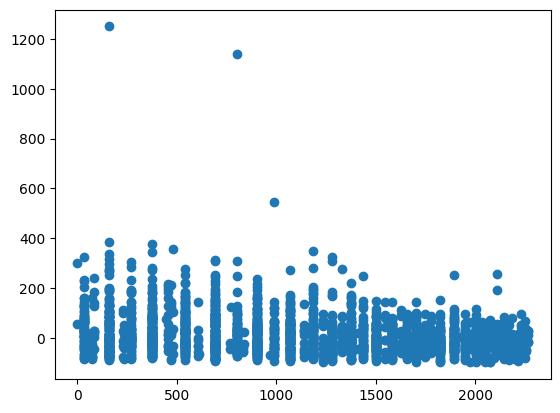

In [432]:
_data = reg_results.loc[reg_results["y"] >= 1_000_000]
plt.scatter(_data["y"].rank(), _data["rel_error"])
# plt.xscale("log")

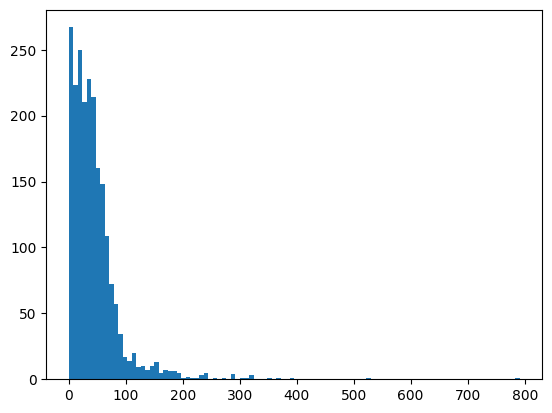

In [133]:
_ = plt.hist(_data["abs_rel_error"], bins=100)

In [349]:
_data.loc[_data["abs_rel_error"] < 20].sort_values("abs_rel_error")

,y,y_pred,diff,rel_error,abs_rel_error
12370,2000000.0,1999946.00,-54.00,-0.002700,0.002700
13917,30000000.0,29992140.00,-7860.00,-0.026200,0.026200
13855,2800000.0,2802711.75,2711.75,0.096848,0.096848
12750,4500000.0,4494607.50,-5392.50,-0.119833,0.119833
12942,10000000.0,10013167.00,13167.00,0.131670,0.131670
...,...,...,...,...,...
13619,2000000.0,2395062.75,395062.75,19.753138,19.753138
13255,28000000.0,22465690.00,-5534310.00,-19.765393,19.765393
11980,3200000.0,2564281.25,-635718.75,-19.866211,19.866211
11743,20000000.0,23976442.00,3976442.00,19.882210,19.882210


In [350]:
_data.sort_values("abs_rel_error")

,y,y_pred,diff,rel_error,abs_rel_error
12370,2000000.0,1999946.00,-54.00,-0.002700,0.002700
13917,30000000.0,29992140.00,-7860.00,-0.026200,0.026200
13855,2800000.0,2802711.75,2711.75,0.096848,0.096848
12750,4500000.0,4494607.50,-5392.50,-0.119833,0.119833
12942,10000000.0,10013167.00,13167.00,0.131670,0.131670
...,...,...,...,...,...
14681,2000000.0,9509378.00,7509378.00,375.468900,375.468900
14589,1500000.0,7252604.50,5752604.50,383.506967,383.506967
13260,4500000.0,29057960.00,24557960.00,545.732444,545.732444
13752,3500000.0,43389404.00,39889404.00,1139.697257,1139.697257


## Features importance

In [380]:
result = permutation_importance(
    xgboost_reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

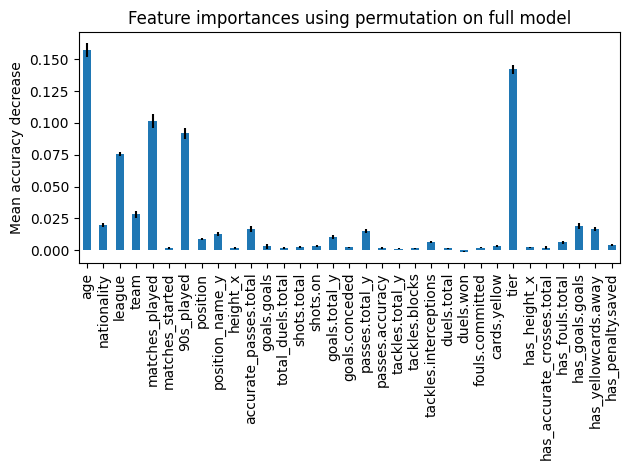

In [381]:
non_zero_feats = np.abs(result.importances_mean) > 1e-03
forest_importances = pd.Series(result.importances_mean[non_zero_feats], index=X_test.columns.values[non_zero_feats])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std[non_zero_feats], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict change in market value between seasons

In [288]:
before_after_seasons = pd.merge(
    players_selected_vars, 
    players_selected_vars, 
    on="player_id_api", 
    suffixes=["_before", "_after"]
).query("season_after - season_before == 1")

In [289]:
numeric_features_ba = [
    f"{c}_{suffix}" for c in [
        "age",
        "matches_played",
        "matches_started",
        "90s_played",
        # "goals_against",
        # "own_goals_against",
        # "shots_on_target_against",
        # "saves",
        # "save%",
        # "saves_inside_box",
        # "penalty_kicks_saves",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
    ]
    for suffix in ["before","after"]
]
numeric_transformer_ba = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_features_ba = [
    f"{c}_{suffix}" for c in [
        "nationality",
        "league",
        "team",
        "tier",
        "position",
    ]
    for suffix in ["before","after"]
]
categorical_transformer_ba = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor_ba = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_ba, numeric_features_ba),
        ("cat", categorical_transformer_ba, categorical_features_ba),
    ]
)

In [290]:
X = before_after_seasons
y_before = np.digitize(before_after_seasons["normalised_market_value_before"], bins)
y_after = np.digitize(before_after_seasons["normalised_market_value_after"], bins)
y = np.minimum(np.maximum(y_after - y_before, -1), 1)

In [291]:
goalkeepers = (X["position_before"] == "Goalkeeper").values
attackers = (X["position_before"] == "Attack").values
defenders = (X["position_before"] == "Defender").values
midfielders = (X["position_before"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [292]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

balanced_accuracy_score(y_test, random.predict(X_test))

0.33146156464755705

In [293]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

goalkeepers 0.31933962264150945
attackers 0.34250457260612094
defenders 0.3437000483253411
midfielders 0.3307335081390222


In [294]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)

print(confusion_matrix(y_test, clf.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, clf.predict(X_test))

[[114 158   9]
 [ 85 675 189]
 [ 13 291 245]]


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5210783048635574

In [295]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], clf.predict(X_test[selector])))

goalkeepers 0.5168763102725367
attackers 0.5321449562617175
defenders 0.5105572283558232
midfielders 0.5077437457357922


"All positions" model performs better on all positions.

In [296]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(32, 16))),
    ]
)
mlp.fit(X_train, y_train)

print(confusion_matrix(y_test, mlp.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, mlp.predict(X_test))

[[147 107  27]
 [141 587 221]
 [ 27 244 278]]


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5493509126694959

In [297]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], mlp.predict(X_test[selector])))

goalkeepers 0.47725366876310277
attackers 0.5595791629306438
defenders 0.5568868257685587
midfielders 0.537931673776396


Only model specific for midfielders perform marginally better.

In [298]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", XGBClassifier()),
    ]
)
xgboost.fit(X_train, y_train+1)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test+1, y_xgboost)

0.6124440172532825

In [299]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector]+1, xgboost.predict(X_test[selector])))

goalkeepers 0.540985324947589
attackers 0.6574722604762374
defenders 0.6108834244080146
midfielders 0.5645142543592904


XGBoost performs here better than MLP, and comparable as position-specific models.

## Features importance

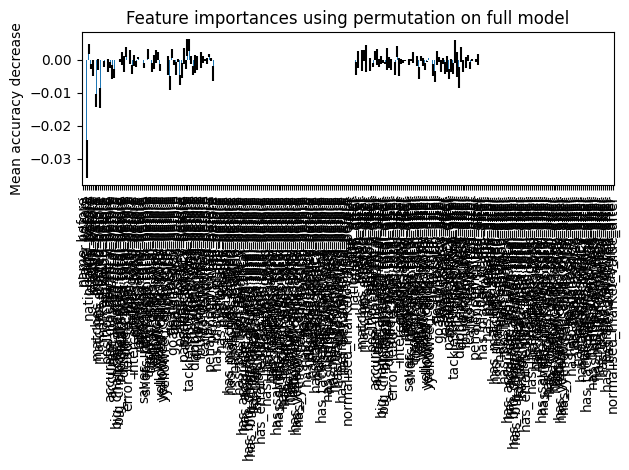

In [300]:
result = permutation_importance(
    xgboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()